task2_step3_analysis.py: Visualize results from reviews_analyzed.csv
purpose: Summarize sentiment, keywords, and themes



In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [12]:
# Load data
df = pd.read_csv('../data/processed/reviews_analyzed.csv', encoding='utf-8')
print("Loaded data with shape:", df.shape)


Loaded data with shape: (1184, 10)


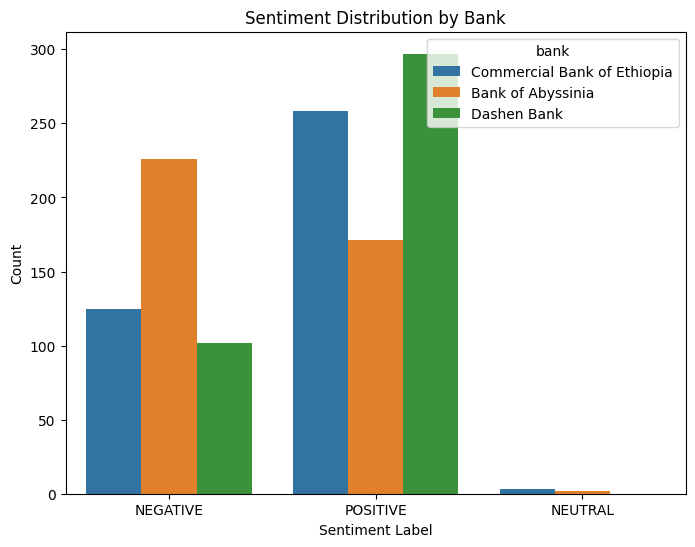

In [13]:
# ## Sentiment Distribution
# The following plot shows the count of positive, negative, neutral, and unknown sentiments for each bank.

# Sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment_label', hue='bank')
plt.title('Sentiment Distribution by Bank')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
os.makedirs('data/processed', exist_ok=True)
plt.savefig('data/processed/sentiment_distribution.png')
plt.show()

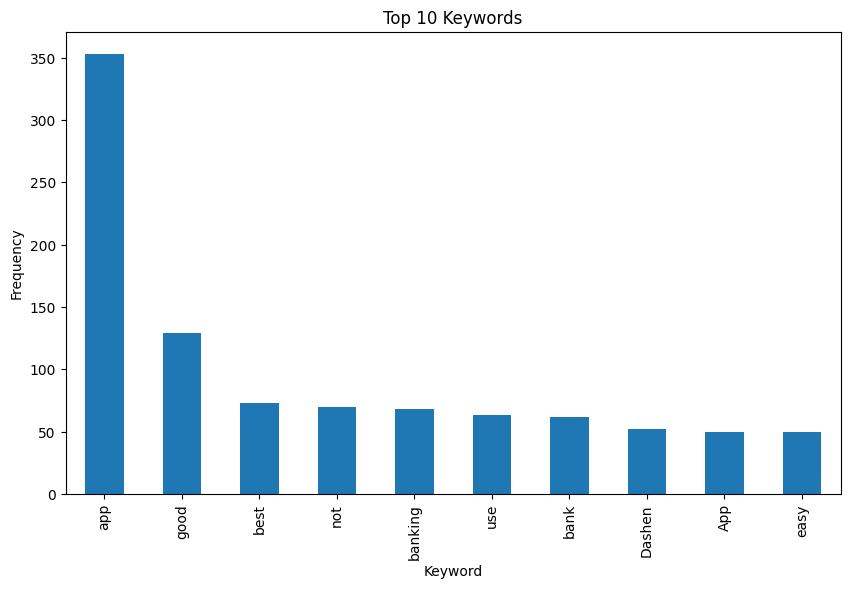

In [14]:
# ## Top Keywords
# The following plot shows the 10 most frequent keywords extracted from the reviews.

# Top keywords
keywords = [kw for kws in df['keywords'].apply(eval) for kw in kws]
top_keywords = pd.Series(keywords).value_counts().head(10)
plt.figure(figsize=(10, 6))
top_keywords.plot(kind='bar')
plt.title('Top 10 Keywords')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.savefig('data/processed/top_keywords.png')
plt.show()

In [15]:
# ## Themes per Bank
# The following output lists the proposed themes and associated keywords for each bank.

# Themes per bank
for bank in df['bank'].unique():
    themes = eval(df[df['bank'] == bank]['themes'].iloc[0])
    print(f"{bank} Themes:")
    for theme, kws in themes:
        print(f"  - {theme}: {kws}")

Commercial Bank of Ethiopia Themes:
  - Login Issues: ['crashes', 'designed']
  - Transaction Problems: ['transfer', 'transaction', 'send', 'transferring', 'transfers']
  - App Usability: ['app', 'application', 'apps', 'App', 'happy', 'designed', 'suitable']
  - Customer Support: ['service', 'support']
  - Performance Issues: ['fast', 'perfect', 'slow']
Bank of Abyssinia Themes:
  - Login Issues: ['crashes', 'error', 'sign']
  - Transaction Problems: ['transfer', 'transaction']
  - App Usability: ['app', 'application', 'App', 'apps', 'UI']
  - Customer Support: ['service', 'help', 'customers', 'services']
  - Performance Issues: ['slow', 'Fast']
Dashen Bank Themes:
  - Login Issues: ['design']
  - Transaction Problems: ['transaction', 'payments', 'transactions', 'send', 'payment', 'transfer', 'Transaction', 'pay']
  - App Usability: ['app', 'App', 'application', 'Application', 'SuperApp', 'design', 'disappointing', 'UI', 'appreciate', 'superapp', 'intuitive']
  - Customer Support: ['se